# 1. K-Means

## Milk Dataset

In [35]:
import pandas as pd
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
# milk

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk)

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(df_scaled)
km.labels_

array([3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 0, 4, 1, 4, 4,
       4, 2, 2])

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
import numpy as np
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, km_labels)
    silhouette_scores.append(score)

best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)

Best number of clusters: 2
Best Silhouette Score: 0.5258508931703421


## Nutrient Dataset

In [28]:
import pandas as pd
df = pd.read_csv('../Datasets/nutrient.csv', index_col=0)
# df

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
# df_scaled.head()

In [40]:
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, km_labels)
    silhouette_scores.append(score)

best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)

Best number of clusters: 2
Best Silhouette Score: 0.5258508931703421


## Recency Frequency Monetary

In [41]:
df = pd.read_csv('../Cases/Recency Frequency Monetary/rfm_data_customer.csv')
df.head()

,customer_id,revenue,most_recent_visit,number_of_orders,recency_days
0,22086,777,2006-05-14,9,232
1,2290,1555,2006-09-08,16,115
2,26377,336,2006-11-19,5,43
3,24650,1189,2006-10-29,12,64
4,12883,1229,2006-12-09,12,23


In [42]:
df2 = df.drop('most_recent_visit', axis=1)

In [43]:
df2.shape

(39999, 4)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [46]:
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, km_labels)
    silhouette_scores.append(score)

best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
best_score = np.max(silhouette_scores)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)

Best number of clusters: 2
Best Silhouette Score: 0.27177741694859203


## Cluster Analysis for best no of clusters

In [56]:
km = KMeans(n_clusters=3, random_state=24)
km_labels = km.fit_predict(df_scaled)

In [57]:
df_clust = df2.copy()
df_clust['Clust'] = km_labels.astype(str)
df_clust.groupby('Clust').mean()

,customer_id,revenue,number_of_orders,recency_days
Clust,,,,
0,29654.950840,1177.028635,12.026235,131.97302
1,8987.116728,1077.518648,11.131090,137.28305
2,21444.663968,635.789017,7.028601,256.73423


In [75]:
from pca import pca

In [72]:
import pandas as pd
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
# milk

In [73]:
df_scaled = scaler.fit_transform(milk)

In [77]:
model = pca()
results = model.fit_transform(df_scaled, col_labels=milk.columns, row_labels=list(milk.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


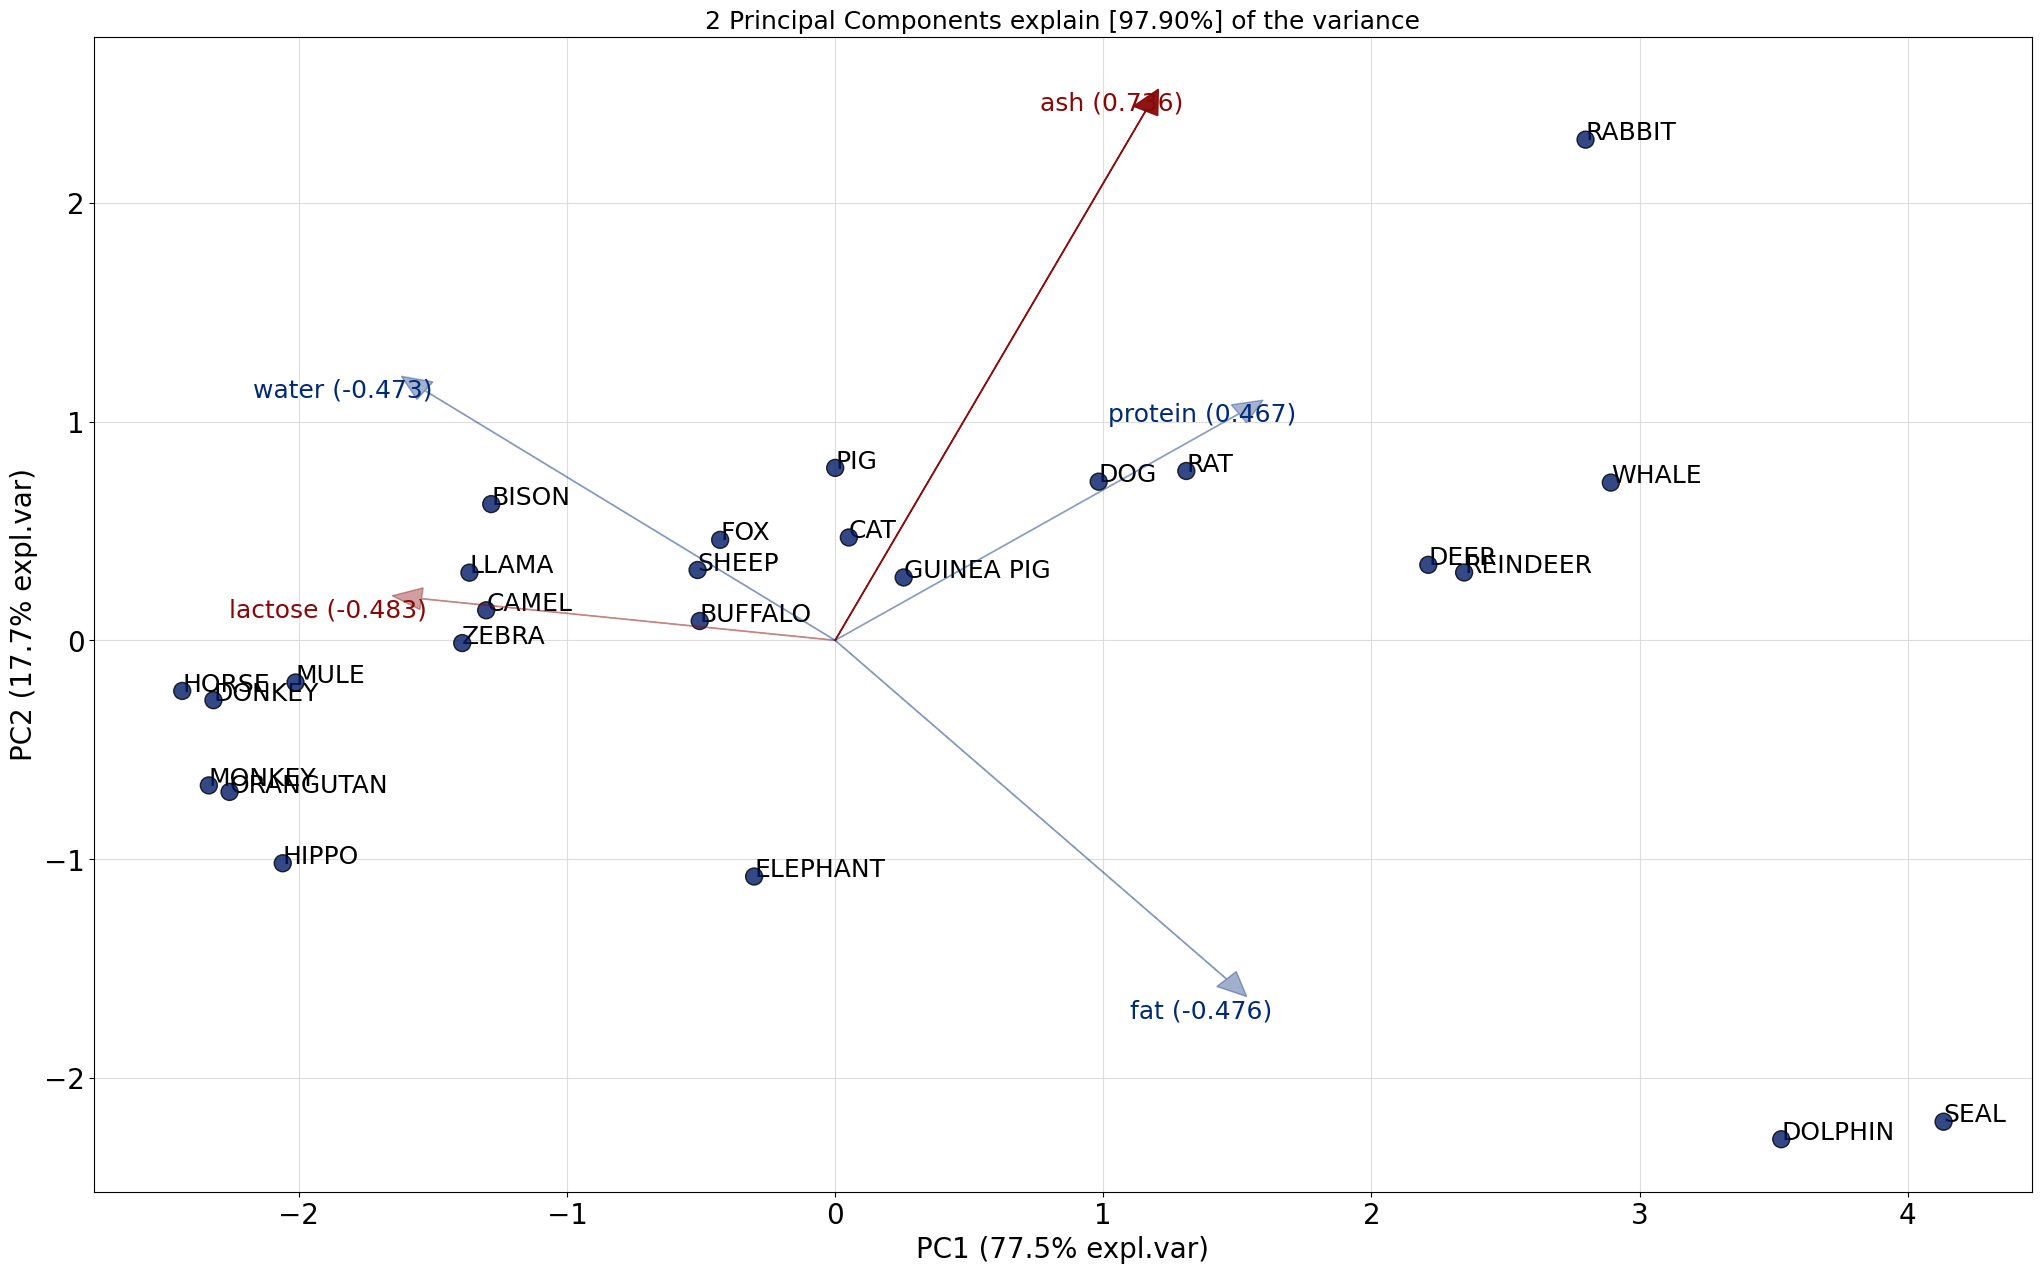

In [84]:
from sklearn.decomposition import PCA
import numpy as np
prcomp = PCA().set_output(transform='pandas')
components = prcomp.fit_transform(df_scaled)
model.biplot(label=True, legend=True)
for i in np.arange(0, milk.shape[0]):
    plt.text(components.values[i,0], components.values[i,1], list(milk.index)[i])


# 2. Inertia and Elbow Method

## Milk 

In [90]:
import pandas as pd
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
df_scaled = scaler.fit_transform(milk)

In [96]:
km = KMeans(n_clusters=20, random_state=24)
km_labels = km.fit_predict(df_scaled)
km.inertia_

0.26044447299548

In [97]:
cluster_range = range(2, 25)
inertias = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    inertias.append(km.inertia_)

best_n_clusters = cluster_range[np.argmin(inertias)]
best_score = np.min(inertias)

print("Best number of clusters:", best_n_clusters)
print("Best Silhouette Score:", best_score)

Best number of clusters: 24
Best Silhouette Score: 0.010596318171281056


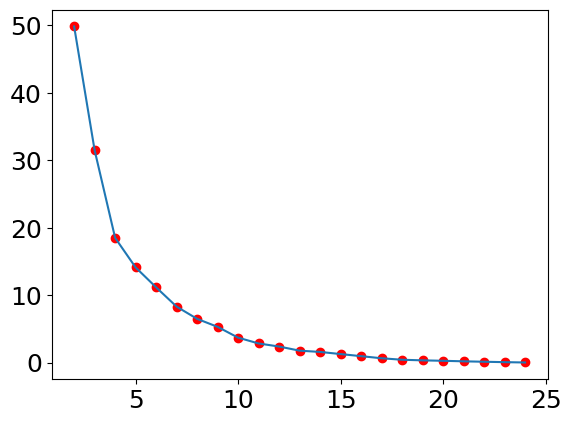

In [100]:
plt.scatter(cluster_range, inertias, c='red')
plt.plot(cluster_range, inertias)

## Nutrient Dataset

In [5]:
import pandas as pd
df = pd.read_csv('../Datasets/nutrient.csv', index_col=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
cluster_range = range(2, 25)
inertias = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    inertias.append(km.inertia_)

best_n_clusters = cluster_range[np.argmin(inertias)]
best_score = np.min(inertias)

print("Best number of clusters:", best_n_clusters)
print("Best inertias Score:", best_score)

Best number of clusters: 24
Best inertias Score: 9.899428960856326


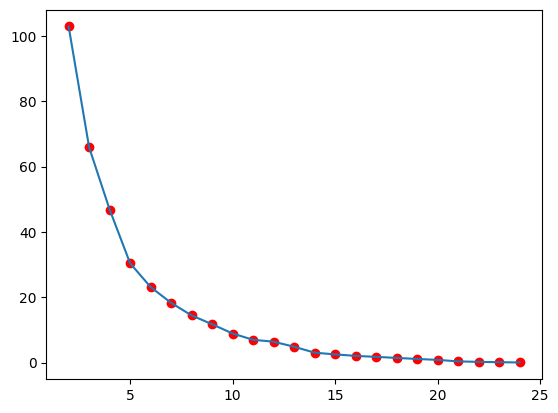

In [10]:
import matplotlib.pyplot as plt
plt.scatter(cluster_range, inertias, c='red')
plt.plot(cluster_range, inertias)

As elbow is observed at 5, hence 5 can be best number of clusters.

## US Arrests Dataset

In [16]:
df = pd.read_csv('../Datasets/USArrests.csv', index_col=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
cluster_range = range(2, 25)
inertias = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    inertias.append(km.inertia_)

best_n_clusters = cluster_range[np.argmin(inertias)]
best_score = np.min(inertias)

print("Best number of clusters:", best_n_clusters)
print("Best inertias Score:", best_score)

Best number of clusters: 24
Best inertias Score: 9.899428960856326


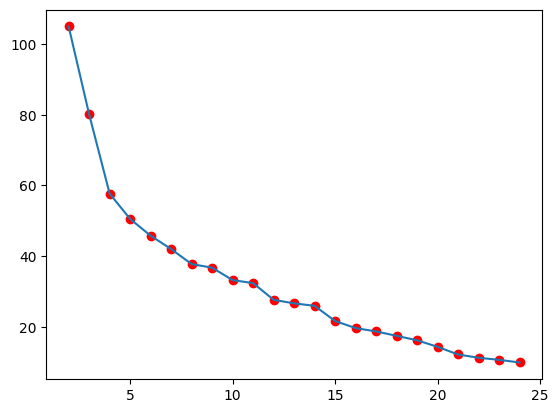

In [19]:
import matplotlib.pyplot as plt
plt.scatter(cluster_range, inertias, c='red')
plt.plot(cluster_range, inertias)

### Iris Dataset

In [34]:
df = pd.read_csv('../Datasets/iris.csv')
df2 = df.drop('Species', axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
df_scl = scl.fit_transform

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
cluster_range = range(2, 25)
inertias = []

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, random_state=24)
    km_labels = km.fit_predict(df_scaled)
    inertias.append(km.inertia_)

best_n_clusters = cluster_range[np.argmin(inertias)]
best_score = np.min(inertias)

print("Best number of clusters:", best_n_clusters)
print("Best inertias Score:", best_score)

Best number of clusters: 24
Best inertias Score: 9.899428960856326


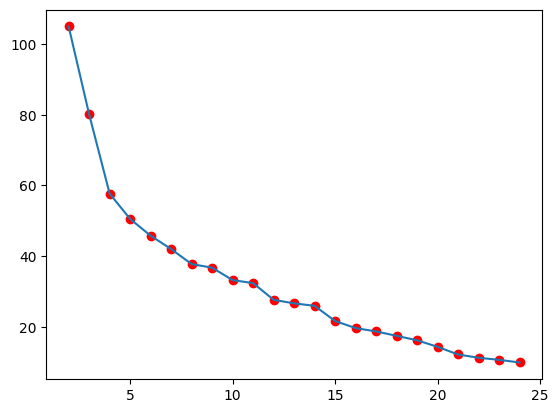

In [37]:
import matplotlib.pyplot as plt
plt.scatter(cluster_range, inertias, c='red')
plt.plot(cluster_range, inertias)